# TOF Sensor Outdoor Tests

## Objective

The objective of this notebook is to determine the sensor's effectiveness in detecting and measuring the distances of vehicles in a real-world setting.

## Overview

First, I mounted the sensor on a stationary bike and positioning it along a busy road to test its ability to detect passing vehicles. Next, with the same set up, the bike was cycled down different roads and the data from overtaking vehicles was collected. I wanted to first test the sensor in a more controlled setting before applying it in a more dynamic environment.

### WaveShare Documentation

- WaveShare's documentation states that the sensor's frequency is 10Hz, meaning that it measures 10 points every second.
- Let's assume the average speed of a cyclist and car is 25km/h and 50km/h respectively. Let's also assume that the average bicycle and car are 2m and 4m in length respectively.

    $$Relative Speed = 50km/h - 25km/h = 25km/h = 6.94m/s (2 d.p.)$$
    $$Distance to Overtake = 4m - 2m = 2m$$
    $$Time to Overtake = 2m / 6.94m/s = 0.29s (2 d.p.)$$
    $$Number of Points Generated = 10 * 0.29s = 2.9$$

- Therefore, the sensor will only generate *2-3 points on average* for each passing car. The number of points generated will be more or less depending on the relative speed and length of the vehicles.

### Code

To prevent this notebook from being cluttered, I have split some of the code into separate Python modules found in the same directory.

- [`data.py`](./data.py) helps to load data measured by the sensor.
- [`graphing.py`](./graphing.py) helps to graph the data for comparison.
- [`preprocessing.py`](./preprocessing.py) helps to preprocess the data.

In [1]:
import pathlib

import matplotlib.pyplot as plt

from data import DataLoader
from graphing import OutdoorGraphs
from preprocessing import DataCleaner

## Stationary Test

In the first test, the sensor was mounted on a stationary bike along Corporation Rd. which saw moderate traffic. I also mounted a Go Pro to capture a video of the vehicles that passed the bike. I cross referenced the data collected from the sensor and the Go Pro's video feed to determine the reliability of the sensor.

### Setup

- I first define the paths to my data and initialize my modules.

In [2]:
STATIONARY_PATH = pathlib.Path("./data/tof_outdoor_tests/stationary_test.txt")
LAKESIDE_RD_PATH = pathlib.Path("./data/tof_outdoor_tests/lakeside_drive.txt")

graphs = OutdoorGraphs()
data_cleaner = DataCleaner()
data_loader = DataLoader()

- I extract the raw data into three lists: times, distances measured, and signal strength.

In [3]:
timing, distances, strengths = data_loader.load_data_from_file(STATIONARY_PATH, clean=False)

### Raw Data

- The scatter plot below represents all the distances measured by the sensor.
- Even though there are very obvious clusters of points representing passing vehicles, the amount of spurious data points is overwhelming.
- Thererfore, I attempted to clean the data in a way that removed spurious points while maintaining the cluster of points which indicate passing vehicles.

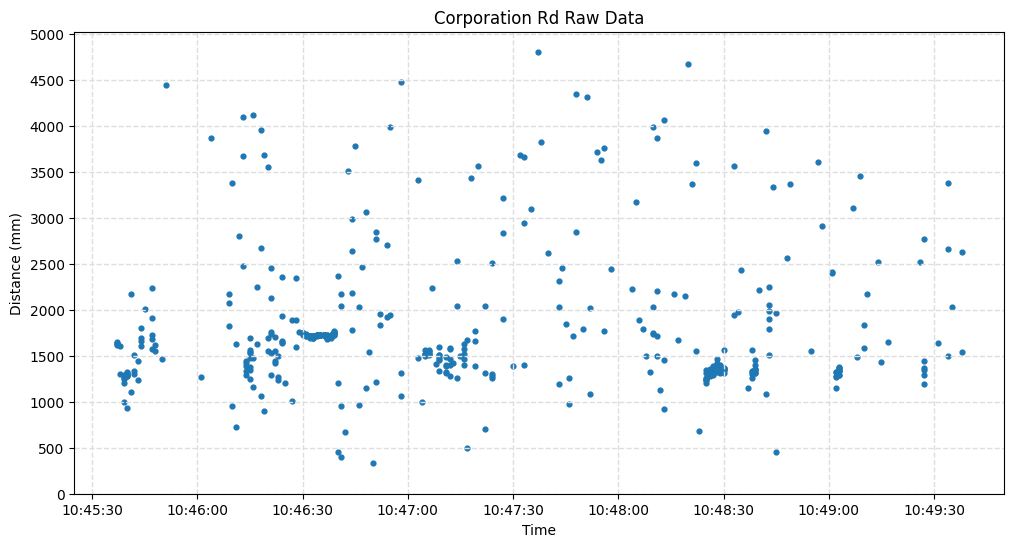

In [4]:
fig, axes = plt.subplots(figsize=(12, 6))
graphs.scatter_time_vs_distance(axes, timing, distances, title="Corporation Rd Raw Data")
plt.show()

### Cleaning Algorithm

- First, I removed all points beyond 2.5m. As seen from the basic testing, I saw the sensor become extremely unreliable in daylight at measuring distances above 2.5m. Furthermore, for goal of this project, it was unimportant to know if vehicles passed the cyclist at more than 2.5m.
- Next, I wanted to check for points in a cluster. I removed all distances that didn't fall in within two points of other distances. A cluster must have at least 2 points or more.
- The first graph below shows the cleaned data and it appears to be more reliable in identifying the clusters representing vehicle passes.
- The second graph show the signal strength of the sensor over time. It can be seen that the signal strength spiked when the points in the first graph form clusters, indicating that some reliable measurements are being made when vehicles pass the sensor.

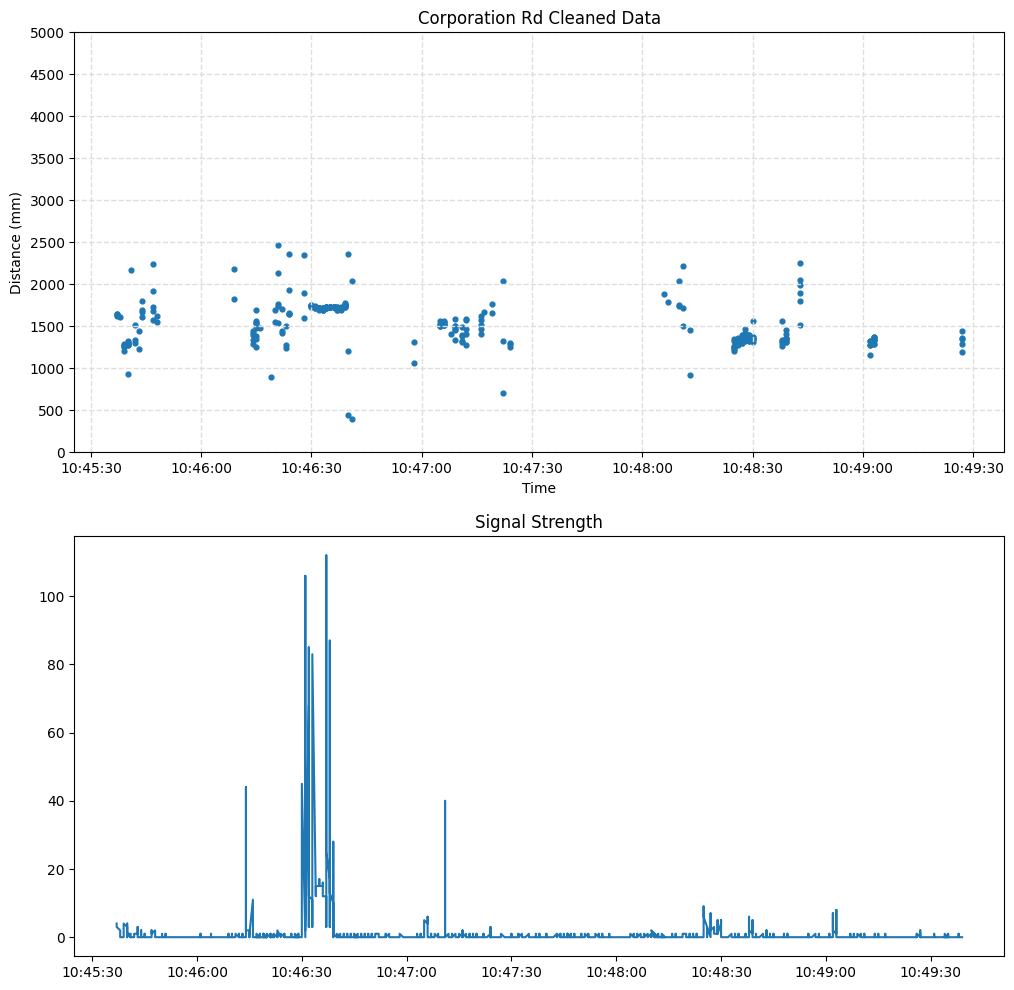

In [5]:
fig, axes = plt.subplots(2, figsize=(12, 12))

cleaned_distances = data_cleaner.clean_spurious_data(distances)
graphs.scatter_time_vs_distance(axes[0], timing, cleaned_distances, title="Corporation Rd Cleaned Data")

axes[1].plot(timing, strengths)
axes[1].set_title("Signal Strength")

plt.show()

- I then cross referenced the videofeed and annotated the cleaned data accordingly.
- The cleaned data seemed very reliable in indicating the clusters where vehicles passed the sensor.
- The first set of points where recorded before the video started.
- The strongest set of points at 10:46:30 was recorded by a car which stopped right next to the sensor at a red light.
- Afterwards the sensor detected a string of 8 vehicles in a cluster at 10:47:10.
- Subsequently, the following clusters show heavy vehicles such as buses and trucks being detected reliably.
- The sensor performs better on heavier, larger vehicles due to their larger surface area which gives it more time to measure and detect.
- Additionally, the sensor is unable to differeniate between a string of vehicles, meaning that a string of vehicles will be recorded a single, cluster of points. 
- It is also important to note that the cars along this road were travelling relatively slow. Therefore, in other conditions, the sensor may not be as reliable as detecting pass vehicles.

![Corporation Road](./data/annotated_graphs/Corporation_Rd.png)

## Cycling Tests

Now, it was time to test the sensor on the road in real-world conditions. I mounted the sensor with its casing on a bike and rode it down different roads in Singapore.

### Lakeside Road

- In this test, the sensor was attached to the bike and cycled down Lakeside Rd which was had very light traffic.
- The scatter plot below show the raw data. Even in this setting with little vehicles, the amount of spurious data was still overwheliming.

In [6]:
timing, distances, strengths = data_loader.load_data_from_file(LAKESIDE_RD_PATH, clean=False)

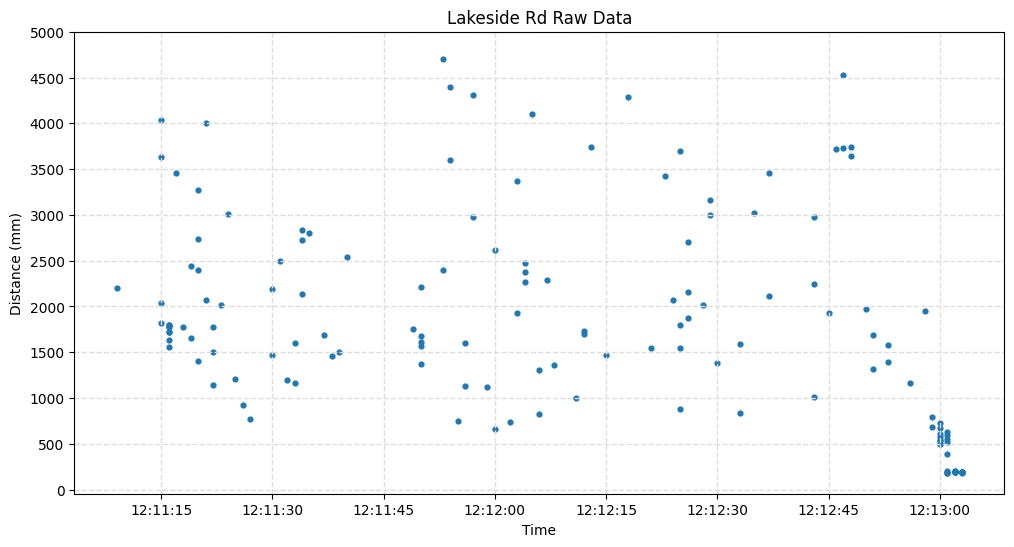

In [7]:
fig, axes = plt.subplots(figsize=(12, 6))
graphs.scatter_time_vs_distance(axes, timing, distances, title="Lakeside Rd Raw Data")
plt.show()

- I used the same cleaning algorithm to clean the raw data.
- Below is a scatter plot of the cleaned data, which again appears to correctly identify the clusters of points representing vehicle passes.
- The second graph shows signal strength, which appears to spike only at the biggest clusters. This also implies that the sensor is not very confident when smaller vehicles like cars pass it.

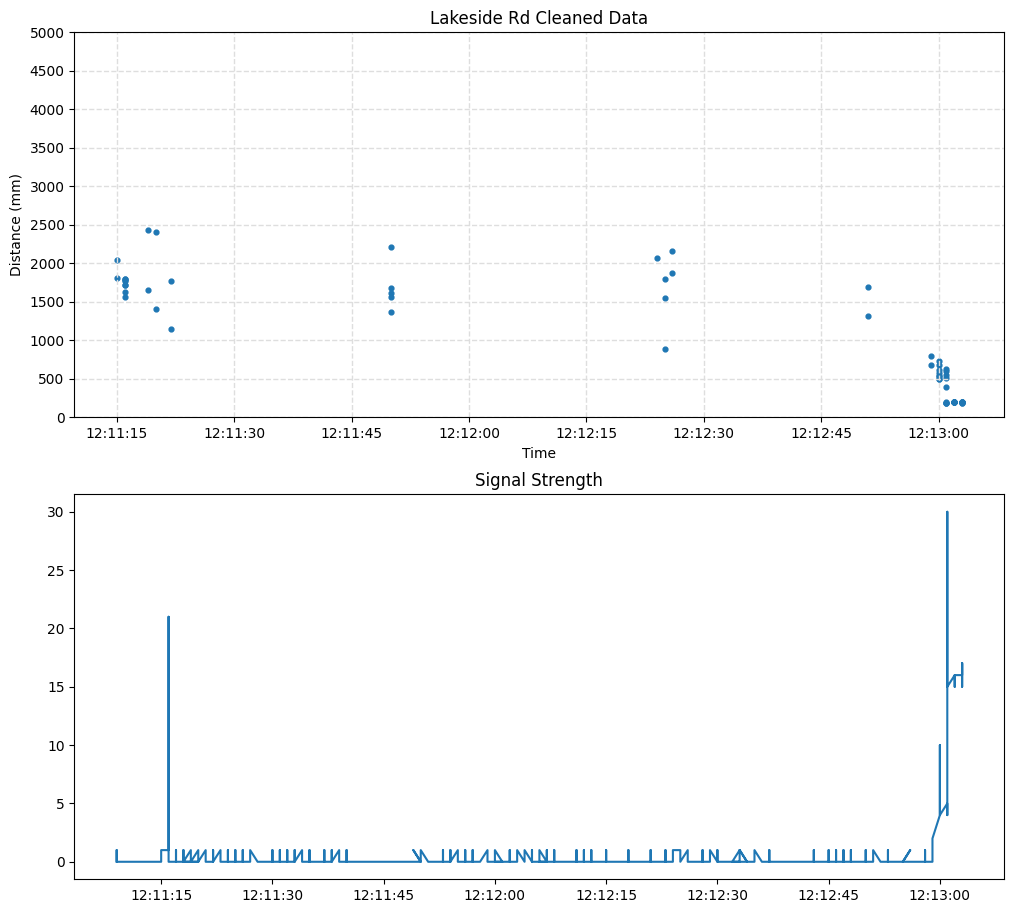

In [8]:
fig, axes = plt.subplots(2, figsize=(12, 11))

cleaned_distances = data_cleaner.clean_spurious_data(distances)
graphs.scatter_time_vs_distance(axes[0], timing, cleaned_distances, title="Lakeside Rd Cleaned Data")

axes[1].plot(timing, strengths)
axes[1].set_title("Signal Strength")

plt.show()

- Next, I annotated the graph using the Gro Pro videofeed to show the points at which vehicles passed the bike.
- The first set of points was created before the video feed started and before the bike started moving.
- We can see that the sensor could detect 3 passing vehicles - a moving car, a moving truck, and a stationary struck near the end. The cluster of points formed at the stationary truck is very obvious as the truck was the closest to the bike and was also not moving.
- It can also be seen that the sensor failed to detect a moving motorbike, as it was too small.
- Around 12:12:46 there are two spurious data points that weren't cleaned.

![Lakeside Rd Annotated](./data/annotated_graphs/Lakeside_Rd.png)

## Conclusion

In conclusion, these outdoor tests reveal the difficulty in using the TOF sensor for long-distance, reliable testing. First, the amount of spurious data generated by the sensor is overwhelming and while the cleaning algorithm introduced was somewhat effective, the data still contained leftover spurious points. Moreover, it was difficult to precisely say at what point could a cluster of measurements be considered of a vehicle pass. This was a result of the sensor's very performance in strong daylight. In addition, while testing, the sensor would very easily stop running if it was moved too suddenly from position. Overall, while the TOF is somewhat effective at measuring vehicle passes, I would opt for a sensor that is more robust and reliable.